# Laborator 1 - IA

## Introducere în NumPy și Matplotlib

In [ ]:
# https://www.anaconda.com/docs/tools/working-with-conda/environments

# conda create --name myenv python=3.13                  <=== Create an environment
# conda info --envs                                      <== See a list of all environments
# conda activate myenv                                   <=== Activate the environment
# conda env export > environment.yml                     <=== Export environment config file (.yml)
# conda deactivate                                       <=== Deactivate the environment

### Rulati asta daca nu aveti librariile instalate:

In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-image
# De aceasta va fi nevoie pentru exercitii, puteti sa o instalati mai tarziu

Note: you may need to restart the kernel to use updated packages.


## Importing utils

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

C:\Users\andyz\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## 1. Numpy

## Vectori multidimensionali

### Initializare folosind liste din Python

In [3]:
lst = [1,2 ,3]
print(type(lst))

a = np.array([1, 2, 3])
print(a) # => [1 2 3]
print(type(a)) # tipul obiectului a => <class 'numpy.ndarray'>
print(a.dtype) # tipul elementelor din a => int32 (pe masini virtuale care ruleaza Linux64 sau Colab, o sa fie int64)
print(a.shape) # tuple continand lungimea lui a pe fiecare dimensiune => (3,)
print(a[0]) # acceseaza elementul avand indexul 0 => 1

<class 'list'>
[1 2 3]
<class 'numpy.ndarray'>
int32
(3,)
1


In [7]:
b = np.array([[1, 2, 3], 
              [4, 5, 6]])

print(b.shape) # => (2, 3)
print(b[0][2]) # => 3
print(b[0, 2]) # => 3

(2, 3)
3
3


### np.array() vs np.asarray()

In [8]:
# asarray(x) se comporta ca array(x, copy=False)

# asarray(x):
# 1. Verifica dacă x este deja un obiect de tip numpy.ndarray.
# 2. Daca DA, nu mai aloca memorie noua si il lasa in pace.
# 3. Daca NU, il converteste in numpy.ndarray.

# HERE <======================= What is exactly asarray ? When do we use it ?

c = np.asarray([[1, 2], [3, 4]])
print(type(c)) # => <class 'numpy.ndarray'>
print(c.shape) # => (2, 2)

<class 'numpy.ndarray'>
(2, 2)


In [10]:
a = np.array([1, 2, 3])
b = np.array(a)      # face o copie
c = np.asarray(a)    # NU face o copie, se refera la acelasi array

print(a is b)  # False (copie)
print(a is c)  # True  (acelasi obiect)

False
True


In [5]:
# Generate a matrix
A = np.matrix(np.ones((3, 3)))
A

matrix([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [6]:
print(type(A))

<class 'numpy.matrix'>


In [12]:
# Use numpy.array to modify A. Doesn't work because you are modifying a copy.
np.array(A)[2] = 2
A

matrix([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [13]:
# Use numpy.asarray to modify A. It worked because you are modifying A itself.
np.asarray(A)[2] = 2
A

matrix([[1., 1., 1.],
        [1., 1., 1.],
        [2., 2., 2.]])

Cand folosim .asarray() ?

- Mainly cand vrem sa ne asiguram ca input-ul e de tip np.ndarray dar nu vrem sa-l copiem inutil.
(de obicei in biblioteci sau coduri performante, in chestii de tipul x = np.asarray(x))

### Initializare folosind functii prestabilite

In [17]:
zero_array = np.zeros((3, 2)) # creeaza un vector continand numai 0
print("Array created using np.zeros()\n", zero_array, "\n")

ones_array = np.ones((2, 2)) # creeaza un vector continand numai 1
print("Array created using np.ones()\n", ones_array, "\n")

constant_array = np.full((2, 2), 8) # creeaza un vector constant
print("Array created using np.full()\n", constant_array, "\n")

identity_matrix = np.eye(3) # creeaza matricea identitate de dimensiune 3x3
print("Array created using np.eye()\n", identity_matrix)

Array created using np.zeros()
 [[0. 0.]
 [0. 0.]
 [0. 0.]] 

Array created using np.ones()
 [[1. 1.]
 [1. 1.]] 

Array created using np.full()
 [[8 8]
 [8 8]] 

Array created using np.eye()
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [20]:
random_array = np.random.random((1,2)) # creeaza un vector cu valori aleatoare
                                       # uniform distribuite intre [0, 1)
print("Array created using np.random.random()\n", random_array) # => ex: [[0.00672748 0.12277961]]

Array created using np.random()
 [[0.97827323 0.57995742]]


In [28]:
mu, sigma = 0, 0.1
gaussian_random = np.random.normal(mu, sigma, (3,6))         # creeaza un vector cu valori random 
                                                             # cu distributie Gaussiana 
                                                             # de medie mu si deviatie standard (std) sigma
gaussian_random

array([[-0.09544106, -0.08793671,  0.19401992,  0.03377257,  0.02545452,
         0.08638062],
       [ 0.09607203, -0.02410696,  0.17298089, -0.01906814,  0.06841925,
        -0.03867997],
       [-0.07510766, -0.00223048, -0.10989072,  0.12760341,  0.05910988,
        -0.04603179]])

In [29]:
first_5 = np.arange(5) # creeaza un vector continand primele 5 numere naturale
print(first_5)         # => [0 1 2 3 4]

[0 1 2 3 4]


## Indexare

### Slicing: extragerea unei submulțimi

- Trebuie specificați indecșii doriți pe fiecare dimensiune


In [50]:
array_to_slice = np.array([[1,2,3,4], 
                           [5,6,7,8], 
                           [9,10,11,12]])

slice = array_to_slice[:, 0:3] # luam toate liniile si coloanele 0, 1, 2

print(slice) # => [[ 1 2 3]
                # [ 5 6 7]
                # [ 9 10 11]]

[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]


In [51]:
# !!! Modificarea slice duce automat la modificarea array_to_slice

print(array_to_slice[0][0]) # => 1
slice[0][0] = 100
print(array_to_slice[0][0]) # => 100

1
100


In [53]:
# Pentru a nu se intampla acest lucru submultimea poate fi copiata

array_to_slice = np.array([[1,2,3,4], 
                           [5,6,7,8], 
                           [9,10,11,12]])

slice_copy = np.copy(array_to_slice[:, 0:3])
slice_copy[0][0] = 100
print(slice_copy[0][0]) # => 100
print(array_to_slice[0][0]) # => 1

100
1


- În cazul în care unul din indecși este un întreg, dimensiunea submulțimii returnate este mai mică decât dimensiunea inițială:

In [54]:
slice_1 = array_to_slice[2:3, :]
print(slice_1, "\n") # => [[ 9 10 11 12]]

slice_2 = array_to_slice[2, :]
print(slice_2, "\n") # => [ 9 10 11 12]

# returnarea tuturor elementelor intr-un array 1D:
slice_1d = np.ravel(slice_1)
print(slice_1d, "\n") # => [ 9 10 11 12]

# dimensiunea vectorilor poate fi modificata folosind functia np.reshape
reshaped_array = np.reshape(array_to_slice, (2, 6))
print(reshaped_array, "\n") # => [[ 1 2 3 4 5 6]
                                # [ 7 8 9 10 11 12]]

[[ 9 10 11 12]] 

[ 9 10 11 12] 

[ 9 10 11 12] 

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]] 



### Folosind vectori intregi

In [55]:
print(array_to_slice[[0,0], [1,3]])  # afiseaza elementele de pe pozitiile
                                     # [0,1] si [0,3] => [2 4]

[2 4]


### Folosind vectori de valori bool

In [58]:
# Vrem sa afisam toate elementele mai mari decat 10 din array_to_slice

bool_idx = (array_to_slice > 10) # rezulta o matrice de aceeasi dimensiune cu
                                 # array_to_slice in care fiecare element consta
                                 # intr-o valoare bool astfel:
                                 # True, daca elementul corespunzator din array_to_slice > 10
                                 # False, daca elementul corespunzator din array_to_slice <= 10

print(bool_idx) # => [[ True False False False]
                # [False False False False]
                # [False False True True]]
        
print(array_to_slice[bool_idx]) # => [11 12]

# Operatia se poate face si direct:
print(array_to_slice[array_to_slice > 10]) # => [11 12]

[[False False False False]
 [False False False False]
 [False False  True  True]]
[11 12]
[11 12]


## Functii matematice

- Operațiile matematice de bază sunt disponibile atât ca funcții NumPy cât și ca operatori. Acestea sunt aplicate element cu element:


In [62]:
x = np.array([[1,2],[3,4]], dtype = np.float64)
y = np.array([[5,6],[7,8]], dtype = np.float64)

# Suma element cu element => [[ 6.0 8.0]
                            # [ 10.0 12.0]]
print("Suma element cu element\n")
print(x + y)
print(np.add(x, y))

# Diferenta element cu element => [[ -4.0 -4.0]
                                 # [-4.0 -4.0]]
print("\nDiferenta element cu element\n")
print(x - y)
print(np.subtract(x, y))

# Produs element cu element => [[ 5.0 12.0]
                              # [ 21.0 32.0]]
print("\nProdus element cu element\n")
print(x * y)
print(np.multiply(x, y))

# Impartire element cu element => [[ 0.2 0.33333333]
                                 # [ 0.42857143 0.5]]
print("\nImpartire element cu element\n")
print(x / y)
print(np.divide(x, y))

# Radical element cu element => [[ 1. 1.41421356]
                               # [ 1.73205081 2.]]
print("\nRadical element cu element\n")
print(np.sqrt(x))

# Ridicare la putere 
print("\nRidicare la putere element cu element\n")
my_array = np.arange(5)
powered = np.power(my_array, 3)
print(powered) # => [ 0 1 8 27 64]
#print(np.power(x, 3))

Suma element cu element

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]

Diferenta element cu element

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]

Produs element cu element

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]

Impartire element cu element

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]

Radical element cu element

[[1.         1.41421356]
 [1.73205081 2.        ]]

Ridicare la putere element cu element

[ 0  1  8 27 64]


### Produsul scalar

In [12]:
x = np.array([[1, 2],[3, 4]])
y = np.array([[5, 6],[7, 8]])
v = np.array([9, 10])
w = np.array([11, 12])

# dot product/produs scalar: vector x vector => 9 x 11 + 10 x 12 = 219

print(v.dot(w))
print(np.dot(v, w))

# matrice x vector => [29 67]
print(np.matmul(x, v))

# matrice x matrice => [[19 22]
                      # [43 50]]
print(np.matmul(x, y))

219
219
[29 67]
[[19 22]
 [43 50]]


- dot(v, w) > 0 -> vectorii sunt in aceeasi direcție
- dot(v, w) = 0 -> vectorii sunt ortogonali
- dot(v, w) < 0 -> vectorii sunt in directii opuse

In [17]:
# (Paranteza)
# Daca am vrea CROSS PRODUCT, aka produsul vectorial (un alt vector, perpendicular pe cei doi vectori input)

v = (3, 4, 6)
w = (5, 9, 2)

z = np.cross(v, w)
print(z)

[-46  24   7]


### Operații pe matrici

In [66]:
# transpusa unei matrici
my_array = np.array([[1, 2, 3], [4, 5, 6]]) # [[1, 2, 3],
                                            # [4, 5, 6]]
print(my_array.T) # => [[1, 4],
                      # [2, 5],
                      # [3, 6]]
print("\n")
# inversa unei matrici
my_array = np.array([[1., 2.], [3., 4.]])
print(np.linalg.inv(my_array)) # => [[-2. , 1. ],
                                   # [ 1.5, -0.5]]

[[1 4]
 [2 5]
 [3 6]]


[[-2.   1. ]
 [ 1.5 -0.5]]


- NumPy dispune de funcții care realizează operații pe o anumită dimensiune:

In [72]:
x = np.array([[1, 2],
              [3, 4]])

# suma pe o anumita dimensiune
print(np.sum(x)) # Suma tuturor elementelor => 10
print(np.sum(x, axis = 0)) # Suma pe coloane => [4 6]
print(np.sum(x, axis = 1)) # Suma pe linii => [3 7]
print("\n")

# putem specifica si mai multe axe pe care sa se faca operatia:
print(np.sum(x, axis = (0, 1))) # Suma tuturor elementelor => 10
print("\n")

# media pe o anumita dimensiune
y = np.array([[[1, 2, 3, 4], [5, 6, 7, 8]], 
              [[1, 2, 3, 4], [5, 6, 7, 8]], 
              [[1, 2, 3, 4], [5, 6, 7, 8]]])
print(y.shape) # => (3, 2, 4)
print(y) # => [[[1 2 3 4]
             # [5 6 7 8]]
             # [[1 2 3 4]
             # [5 6 7 8]]
             # [[1 2 3 4]
             # [5 6 7 8]]]
print("\n")
           
print(np.mean(y, axis = 0)) # => [[1. 2. 3. 4.]
                            # [5. 6. 7. 8.]]
print("\n")
print(np.mean(y, axis = 1)) # => [[3. 4. 5. 6.]
                            # [3. 4. 5. 6.]
                            # [3. 4. 5. 6.]]
print("\n")

# indexul elementului maxim pe fiecare linie
z = np.array([[10, 12, 5], 
              [17, 11 ,19]])
print(np.argmax(z, axis = 1)) # => [1 2]
print("\n")

10
[4 6]
[3 7]


10


(3, 2, 4)
[[[1 2 3 4]
  [5 6 7 8]]

 [[1 2 3 4]
  [5 6 7 8]]

 [[1 2 3 4]
  [5 6 7 8]]]


[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]


[[3. 4. 5. 6.]
 [3. 4. 5. 6.]
 [3. 4. 5. 6.]]


[1 2]




### Broadcasting

Broadcasting: mecanism care oferă posibilitatea de a realiza operații aritmetice între vectori de dimensiuni diferite
Vectorul mai mic este multipilcat astfel încât să se potrivească cu cel mai mare, operația fiind apoi realizată pe cel din urmă

- Vrem sa adunam un vector (v) la fiecare linie a unei matrici (m)

In [19]:
m = np.array([[1,2,3], 
              [4,5,6], 
              [7,8,9], 
              [10, 11, 12]])

v = np.array([1, 0, 1])
y = m + v
print(y)

# Practic, y e "lungit" la
# [[1, 0, 1],
#  [1, 0, 1],
#  [1, 0, 1],
#  [1, 0, 1]]

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


#### Putem opri broadcasting?

- Raspuns simplu: Not really

In [25]:
# Putem "forta" o transpusa a matricilor pentru incompatibilitate dimensiuni, de genul

m = np.array([[1,2,3], 
              [4,5,6], 
              [7,8,9], 
              [10, 11, 12]])

v = np.array([[1, 0, 1]])  # shape (1, 3)
m + v.T  # v.T are shape (3,1), acum avem (4,3) + (3,1) => Eroare (ne trebuie macar o dimensiune la fel)

ValueError: operands could not be broadcast together with shapes (4,3) (3,1) 

#### La ce e util broadcasting în Inteligență Artificială?

- Cand adaugam bias in retele neuronale: W @ X + b (b e broadcasted pe toata matricea w@x = exemplu din batch
- Normalizari in standard scaler (putem avea matrici de mean/std, dar la normalizari pe tot setul de date X se face broadcast automat

#### Reguli compatibilitate broadcast:

- Daca doua array-uri au dimensiuni diferite, NumPy le aliniaza la dreapta
- Doua dimensiuni sunt compatibile daca sunt egale, sau una din ele este 1

## 2. Matplotlib

- bibliotecă utilizată pentru plotarea datelor

### Plotare

- cea mai importantă funcție este plot, care permite afișarea datelor 2D

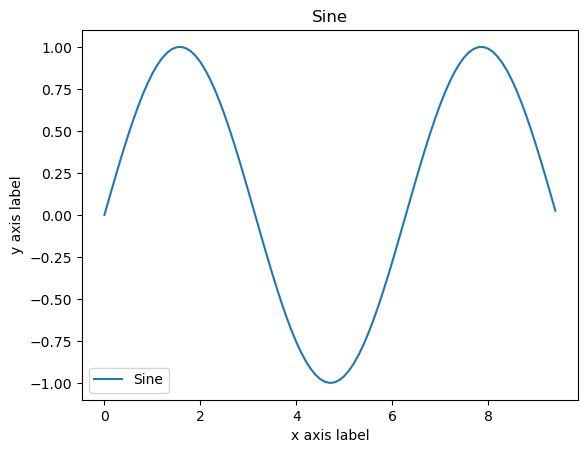

In [9]:
# Calculeaza coordonatele (x, y) ale punctelor de pe o curba sin
# x - valori de la 0 la 3 * np.pi, luate din 0.1 in 0.1

x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Ploteaza punctele
plt.plot(x, y)
#plt.plot(x, y, 'o') - Daca vrem puncte in loc de interpolare

# Adauga etichete pentru fiecare axa
plt.xlabel('x axis label')
plt.ylabel('y axis label')

# Adauga titlu
plt.title('Sine')

# Adauga legenda
plt.legend(['Sine'])

# Afiseaza figura
plt.show()

#### Plotarea mai multor grafice în cadrul aceleiași figuri:

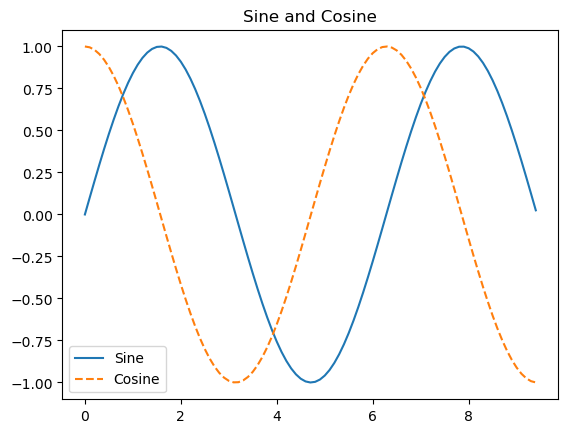

In [26]:
# Calculeaza coordonatele (x, y) ale punctelor de pe o curba sin, respectiv cos
# x - valori de la 0 la 3 * np.pi, luate din 0.1 in 0.1

x = np.arange(0, 3 * np.pi, 0.1)
y_1 = np.sin(x)
y_2 = np.cos(x)

# Ploteaza punctele in aceeasi figura
plt.plot(x, y_1, '-')
plt.plot(x, y_2, '--')

# Adauga titlu
plt.title('Sine and Cosine')

# Adauga legenda
plt.legend(['Sine', 'Cosine'])

# Afiseaza figura
plt.show()

#### Plotarea simultană a mai multor grafice în figuri diferite:

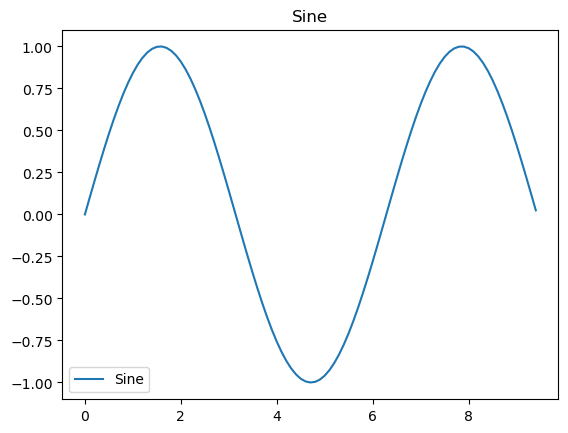

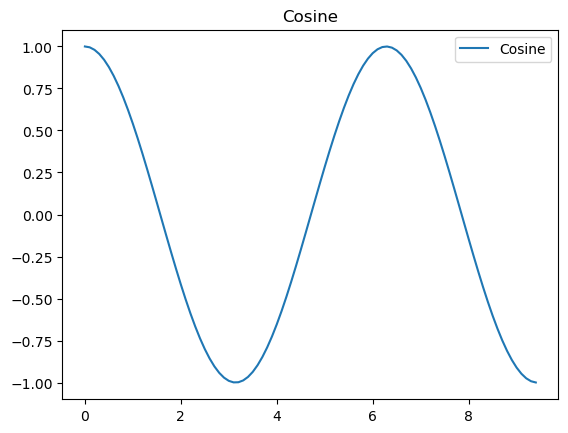

In [82]:
# Calculeaza coordonatele (x, y) ale punctelor de pe o curba sin, respectiv cos
# x - valori de la 0 la 3 * np.pi, luate din 0.1 in 0.1

x = np.arange(0, 3 * np.pi, 0.1)
y_1 = np.sin(x)
y_2 = np.cos(x)

# definim primul plot in figura 1
first_plot = plt.figure(1)
plt.plot(x, y_1)
plt.title('Sine')
plt.legend(['Sine'])

# definim cel de-al doilea plot in figura 2
second_plot = plt.figure(2)
plt.plot(x, y_2)
plt.title('Cosine')
plt.legend(['Cosine'])

# afisam figurile
plt.show()

#### Subplotare

- putem plota mai multe subfiguri în cadrul aceleiași figuri

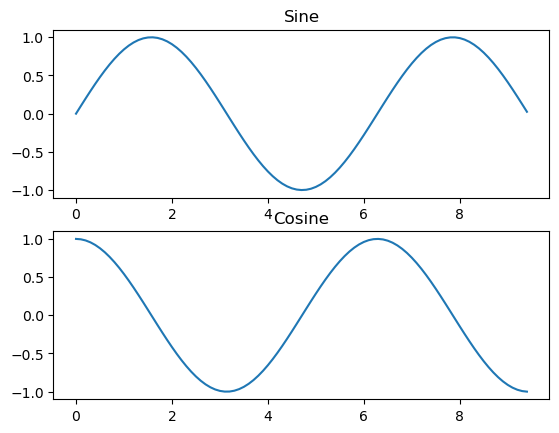

In [85]:
# Calculeaza coordonatele (x, y) ale punctelor de pe o curba sin, respectiv cos
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Creeaza un grid avand inaltimea 2 si latimea 1 si seteaza primul subplot ca activ
plt.subplot(2, 1, 1)

# Ploteaza primele valori
plt.plot(x, y_sin)
plt.title('Sine')

# Seteaza cel de-al doilea subplot ca activ si ploteaza al doilea set de date
plt.subplot(2, 1, 2)

# Ploteaza urmatoarele valori
plt.plot(x, y_cos)
plt.title('Cosine')

# Afiseaza figura
plt.show()